# Import libraries

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from torchvision import datasets

# Download dataset

In [10]:
t = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

batch_size = 128
trainset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=t)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                           shuffle=True, num_workers=0)




Files already downloaded and verified


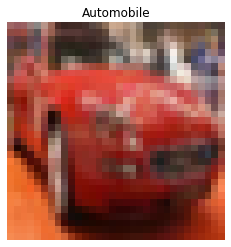

In [11]:
#plot image from dataset
import matplotlib.pyplot as plt

classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

sample_data = trainset.__getitem__(5)
image, label = sample_data

image = image.permute(1, 2, 0)
image = ((image.numpy() + 1) * 127.5).astype('uint8')


plt.imshow(image)
plt.axis('off')
plt.title(classes[label])
plt.show()

# Define Model

In [8]:
class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(BasicBlock, self).__init__()
    self.conv2d_1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)  
    self.relu_1 = nn.ReLU()
    self.mpool_1 = nn.MaxPool2d(2)
    self.conv2d_2 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5)  
    self.relu_2 = nn.ReLU()
    self.mpool_2 = nn.MaxPool2d(2)

  def forward(self, x):
    out = self.conv2d_1(x)
    out = self.relu(x)
    out = self.mpool(x)
    out = self.conv2d_2(x)
    out = self.relu(x)
    out = self.mpool(x)


class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()    
    self.linear_1 = nn.Linear(16, 128, bias = True)
    self.relu_1 = nn.ReLU()
    self.linear_2 = nn.Linear(128, 64, bias = True)
    self.relu_2 = nn.ReLU()
    self.linear_3 = nn.Linear(64, 10, bias = True)

  def forward(self, x):
    out = self.linear_1(x)
    out = self.relu_1(x)
    out = self.linear_2(x)
    out = self.relu_2(x)
    out = self.linear_3(x)



# Optimization loop

In [7]:
#hyper parameters
nepochs = 10
learning_rate = 1e-3
device = torch.device('cuda')

#define model and transfer to GPU
model = Classifier().to(torch.device("GPU"))

#define optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-3)
optimizer.step()
optimizer.zero_grad()

#define loss
loss_function = ...

#optimization loop
for epoch in range(nepochs):
  total_loss = 0.
  for i, data in enumerate(trainloader):
    images, labels = data
    images = images.to(device)
    labels = labels.to(device)
    
    predictions = model(images)
    loss = loss_function(predictions, labels)
    total_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('epoch {}/{}: loss = {:.4f}'.format(epoch, nepochs, total_loss))
  total_loss = 0

TypeError: ignored